In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive

/content/drive/My Drive


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=2d3383cc445d7aad6f6b302a8caa3be150feb812850bc60286783891311fb03d
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 8.8 MB/s eta 0:00:00


In [ ]:
!pip install dice_ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 11.7 MB/s eta 0:00:00


In [ ]:
!pip install interpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.7/778.7 kB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.3/247.3 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lime
import shap
import dice_ml
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from IPython.display import display
from lime import lime_tabular
from lime.lime_tabular import LimeTabularExplainer
from interpret.blackbox import LimeTabular
from interpret import show
import json
import matplotlib.pyplot as plt


In [ ]:
# Read the CSV file with the specified delimiter
data = pd.read_csv('bank-additional-full.csv', delimiter=';')

In [ ]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Drop any rows with missing values
data = data.dropna()

In [ ]:
# Separate features (X) and target (y)
x = data.drop('y', axis=1)  # Features
y = data['y']  # Target

In [ ]:
# Convert the target column to numerical values
y = y.map({'no': 0, 'yes': 1})

In [ ]:
# Convert categorical variables to numerical using one-hot encoding
categorical_columns = list(x.select_dtypes(include="object").columns)
# x = pd.get_dummies(x, columns=categorical_columns)

In [ ]:
# Normalize the numerical columns using StandardScaler
numerical_columns = list(x.select_dtypes(exclude="object").columns)

In [ ]:
# Perform oversampling on the features (x) and target (y)
oversampler = RandomOverSampler()
x, y = oversampler.fit_resample(x, y)

In [ ]:
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# for numericals
#The first step is an imputer that fills missing values in numerical columns using the mean strategy.
#The SimpleImputer class from scikit-learn is used for this purpose.
#The second step is a scaler that standardizes the numerical columns by subtracting the mean and dividing by the standard deviation.
#The StandardScaler class from scikit-learn is used for this purpose.
# for categorical
# The first step is an imputer that fills missing values in categorical columns using the most frequent strategy.
#The SimpleImputer class is used, similar to the numerical transformer.
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

encoder = ColumnTransformer([("numerical", numerical_transformer, numerical_columns),
                             ("categorical", categorical_transformer, categorical_columns)])

In [ ]:
# 1. Training a Deep Neural Network

mlp_model = Pipeline(
    [
        ("preprocessor", encoder),
        ("model", MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=200))
    ]
)

# Train the model
mlp_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_mlp = mlp_model.predict(x_test)

# Calculate evaluation metrics
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


In [ ]:
# 2. Training a Random Forest Classifier

rf_model = Pipeline(
    [
        ("preprocessor", encoder),
        ("model", RandomForestClassifier(n_estimators=100))
    ]
)

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(x_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

In [ ]:
# 3. Training an SVM Classifier

svm_model = Pipeline(
    [
        ("preprocessor", encoder),
        ("model", svm.SVC(probability=True))
    ]
)


# Train the model
svm_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(x_test)

# Calculate evaluation metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

In [ ]:
# Print the evaluation metrics for each model
print("Deep Neural Network:")
print("Accuracy:", accuracy_mlp)
print("Precision:", precision_mlp)
print("Recall:", recall_mlp)
print("F1 Score:", f1_mlp)
print()

print("Random Forest:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print()

print("SVM:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)

Deep Neural Network:
Accuracy: 0.9600547195622435
Precision: 0.9276601173768818
Recall: 0.9976673984632273
F1 Score: 0.9613909824143859

Random Forest:
Accuracy: 0.9705882352941176
Precision: 0.944286084477844
Recall: 1.0
F1 Score: 0.9713447954151673

SVM:
Accuracy: 0.9002735978112175
Precision: 0.8621118012422361
Recall: 0.9522502744237102
F1 Score: 0.9049419741817707


# Counterfactual Explanations

In [ ]:
class CounterfactualExplainer:
    def __init__(self, model):
        self.model = model
        self.df = data
        self.X_train, self.X_test = x_train, x_test
        self.cat_features, self.num_features = categorical_columns, numerical_columns
        self.preprocessor = self.model.named_steps["preprocessor"]
        self.ohe_categories = self.preprocessor.named_transformers_["categorical"]["onehot"].categories_
        self.new_ohe_features = [f"{col}__{val}" for col, vals in zip(self.cat_features, self.ohe_categories) for val in
                                 vals]
        self.all_features = self.num_features + self.new_ohe_features

    def cf_explain(self, sample):
        data_dice = dice_ml.Data(dataframe=self.df,
                                 continuous_features=self.num_features,
                                 outcome_name='y')
        model_dice = dice_ml.Model(model=self.model,
                                   backend="sklearn")
        explainer = dice_ml.Dice(data_dice,
                                 model_dice,
                                 method="random")
        feature_weights = {'age': 10}
        dice_exp = explainer.generate_counterfactuals(sample, total_CFs=4, desired_class="opposite",
                                                      proximity_weight=feature_weights)
        json_data = dice_exp.to_json()
        counterfactual_samples = self.generate_counterfactuals(json_data)
        cf_text = ""
        for index, sample in enumerate(counterfactual_samples):
            cf_text += f"\nCounterfactual Result {index + 1}:\n" + sample + "\n"


        return cf_text

    @staticmethod
    def generate_counterfactuals(json_data, precision=2):
        data = json.loads(json_data)

        test_data = data['test_data'][0][0]
        cfs_list = data['cfs_list'][0]

        feature_names = data['feature_names']

        counterfactuals = []

        for cf in cfs_list:
            counterfactual_text = ""
            for i, (original_value, cf_value) in enumerate(zip(test_data, cf)):
                if i < len(feature_names):
                    feature_name = feature_names[i]
                    if isinstance(original_value, float) and isinstance(cf_value, float):
                        original_value = round(original_value, precision)
                        cf_value = round(cf_value, precision)
                    if original_value != cf_value:
                        counterfactual_text += f"   {feature_name}: {original_value} -> {cf_value}\n"

            counterfactuals.append(counterfactual_text)

        return counterfactuals

def cf_explanation(sample, model):
    cf_explainer = CounterfactualExplainer(model)
    return cf_explainer.cf_explain(sample)

In [ ]:
x_test.iloc[[67], :]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
72788,24,admin.,single,high.school,no,yes,no,cellular,jul,thu,725,3,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1


In [ ]:
x_train2 = x_train.copy()
x_test2 = x_test.copy()
y_train2 = y_train.copy()
y_test2 = y_test.copy()

In [ ]:
# Identify categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

In [ ]:
# Apply label encoding to categorical columns
label_encoder = LabelEncoder()
for feature in categorical_cols:
    x_train2[feature] = label_encoder.fit_transform(x_train2[feature])
    x_test2[feature] = label_encoder.transform(x_test2[feature])

In [ ]:
mlp_model2 = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=200)

# Train the model
mlp_model2.fit(x_train2, y_train2)

MLPClassifier(hidden_layer_sizes=(100, 50))

In [ ]:
rf_model2 = RandomForestClassifier(n_estimators=100)

# Train the model
rf_model2.fit(x_train2, y_train2)

RandomForestClassifier()

In [ ]:
svm_model2 = svm.SVC(probability=True)

# Train the model
svm_model2.fit(x_train2, y_train2)

SVC(probability=True)

# User Interface for LIME, Local SHAP and Counterfactual Explanations

Machine Learning Model Explanation Interface
Select Index of Test Data:27
age                        37
job               blue-collar
marital               married
education         high.school
default               unknown
housing                   yes
loan                       no
contact              cellular
month                     may
day_of_week               fri
duration                  181
campaign                    3
pdays                     999
previous                    0
poutcome          nonexistent
emp.var.rate             -1.8
cons.price.idx         92.893
cons.conf.idx           -46.2
euribor3m               1.313
nr.employed            5099.1
Name: 32114, dtype: object
Select Model (MLP/RF/SVM):MLP


  0%|          | 0/1 [00:00<?, ?it/s]

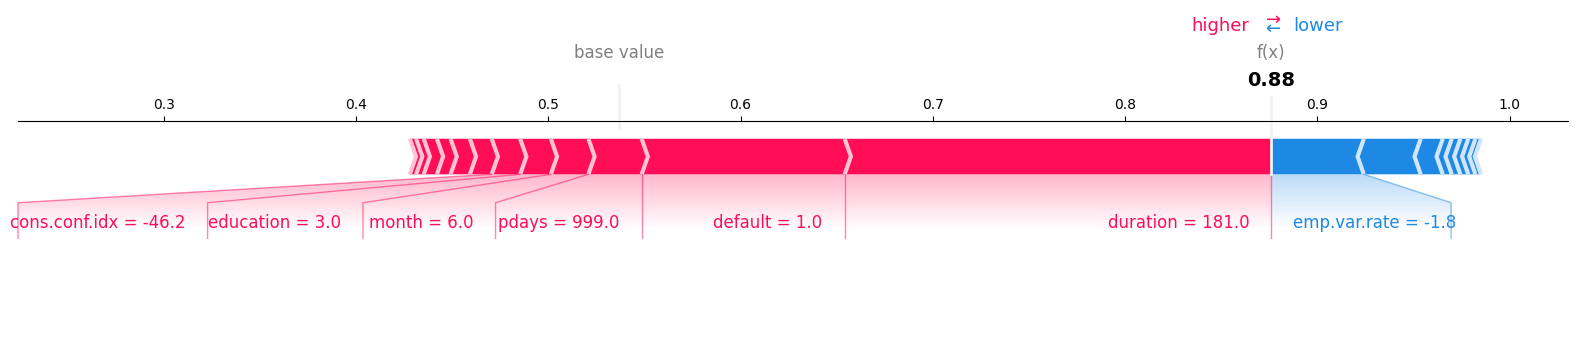

100%|██████████| 1/1 [00:00<00:00,  1.91it/s]


Counterfactual Result 1:
   education: high.school -> basic.9y
   previous: 0 -> 4


Counterfactual Result 2:
   duration: 181 -> 2514


Counterfactual Result 3:
   duration: 181 -> 2580


Counterfactual Result 4:
   duration: 181 -> 2368
   cons.conf.idx: -46.2 -> -26.8




In [ ]:

print('Machine Learning Model Explanation Interface')

# Select test data
n = int(input('Select Index of Test Data:'))

print(x_test.iloc[n])

# Select model
selected_model = input('Select Model (MLP/RF/SVM):')

# Get the selected model
if selected_model == 'MLP':
    model = mlp_model
    model2 = mlp_model2
elif selected_model == 'RF':
    model = rf_model
    model2 = rf_model2
else:
    model = svm_model
    model2 = svm_model2

# Explain using Lime
lime = LimeTabular(model2, data=x_train2,random_state=1)
lime_local = lime.explain_local(x_test2.iloc[n:n+1],y_test.iloc[n:n+1],name='LIME')
show(lime_local)

# Explain using SHAP
explainer = shap.KernelExplainer(model2.predict_proba, x_train2[:100])
shap_values = explainer.shap_values(x_test2.iloc[n].values.reshape(1, -1))
shap.force_plot(explainer.expected_value[0], shap_values[0], x_test2.iloc[n].values.reshape(1, -1), feature_names=x_test2.columns, matplotlib=True)

# Explain using countefactual
print(cf_explanation(x_test.iloc[[n], :], model))

## User Interface for Global SHAP based on the group of samples one after the other(Continuously)

Machine Learning Model Explanation Interface
Select Index of Test Data:15
Select Model (MLP/RF/SVM):RF


  0%|          | 0/15 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning:

Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=7.854e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning:

Regressors in active set degenerate. Dropping a regressor, after 8 iterations, i.e. alpha=3.518e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning:

Regressors in active set degenerate. Dropping a regressor, after 8 iterations, i.e. alpha=3.518e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or 

  0%|          | 0/15 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning:

Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.744e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning:

Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.872e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning:

Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.872e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or 

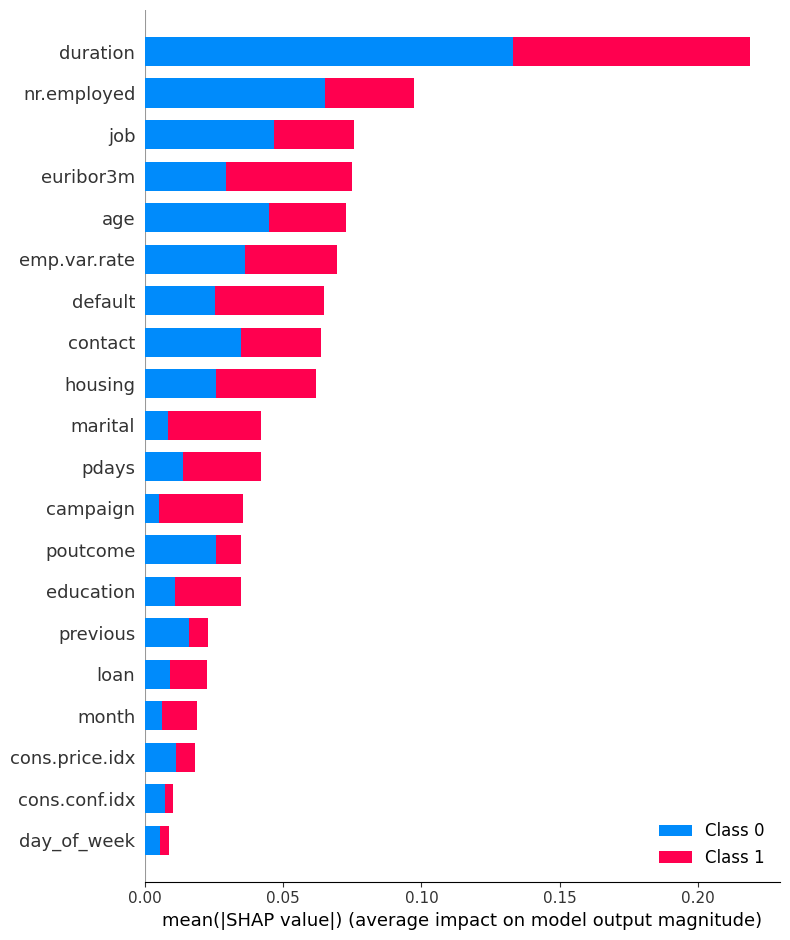

In [ ]:
# Interface
print('Machine Learning Model Explanation Interface')

# Select test data
n = int(input('Select Index of Test Data:'))

# Select model
selected_model = input('Select Model (MLP/RF/SVM):')

# Get the selected model
if selected_model == 'MLP':
    model2 = mlp_model2
elif selected_model == 'RF':
    model2 = rf_model2
else:
    model2 = svm_model2



explainer = shap.KernelExplainer(model2.predict_proba, x_train2[:n])
# Compute SHAP values for global explanation for class 0
shap_values_global_class0 = explainer.shap_values(x_train2[:n], nsamples=n)

# Calculate the mean absolute SHAP values across all instances for class 0
mean_shap_values_class0 = np.abs(shap_values_global_class0).mean(axis=0)

# Compute SHAP values for global explanation for class 1
shap_values_global_class1 = explainer.shap_values(x_train2[:n], nsamples=n, output_inds=1)

# Calculate the mean absolute SHAP values across all instances for class 1
mean_shap_values_class1 = np.abs(shap_values_global_class1).mean(axis=0)

# Plot the global feature importance for both classes using a bar chart
shap.summary_plot([mean_shap_values_class0, mean_shap_values_class1],
                  x_train2[:n],
                  feature_names=x_test2.columns,
                  class_names=['Class 0', 'Class 1'],
                  plot_type="bar")

# User Interface for Global SHAP based on the user inputs

Machine Learning Model Explanation Interface
Enter the number of users for SHAP global explanations: 20
Enter the index of user 1 (between 0 and 58475): 2
Enter the index of user 2 (between 0 and 58475): 5
Enter the index of user 3 (between 0 and 58475): 7
Enter the index of user 4 (between 0 and 58475): 9
Enter the index of user 5 (between 0 and 58475): 20
Enter the index of user 6 (between 0 and 58475): 56
Enter the index of user 7 (between 0 and 58475): 890
Enter the index of user 8 (between 0 and 58475): 900
Enter the index of user 9 (between 0 and 58475): 1000
Enter the index of user 10 (between 0 and 58475): 1200
Enter the index of user 11 (between 0 and 58475): 1250
Enter the index of user 12 (between 0 and 58475): 1400
Enter the index of user 13 (between 0 and 58475): 1700
Enter the index of user 14 (between 0 and 58475): 1900
Enter the index of user 15 (between 0 and 58475): 2100
Enter the index of user 16 (between 0 and 58475): 2200
Enter the index of user 17 (between 0 and 5

  0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning:

Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=2.068e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning:

Regressors in active set degenerate. Dropping a regressor, after 8 iterations, i.e. alpha=1.034e-03, with an active set of 8 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning:

Regressors in active set degenerate. Dropping a regressor, after 8 iterations, i.e. alpha=1.034e-03, with an active set of 8 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or 

  0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning:

Regressors in active set degenerate. Dropping a regressor, after 14 iterations, i.e. alpha=5.254e-05, with an active set of 10 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning:

Regressors in active set degenerate. Dropping a regressor, after 15 iterations, i.e. alpha=5.244e-05, with an active set of 11 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:678: ConvergenceWarning:

Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 16 iterations, alpha=5.244e-05, previous alpha=5.222e-05, with an active set of 11 regressor

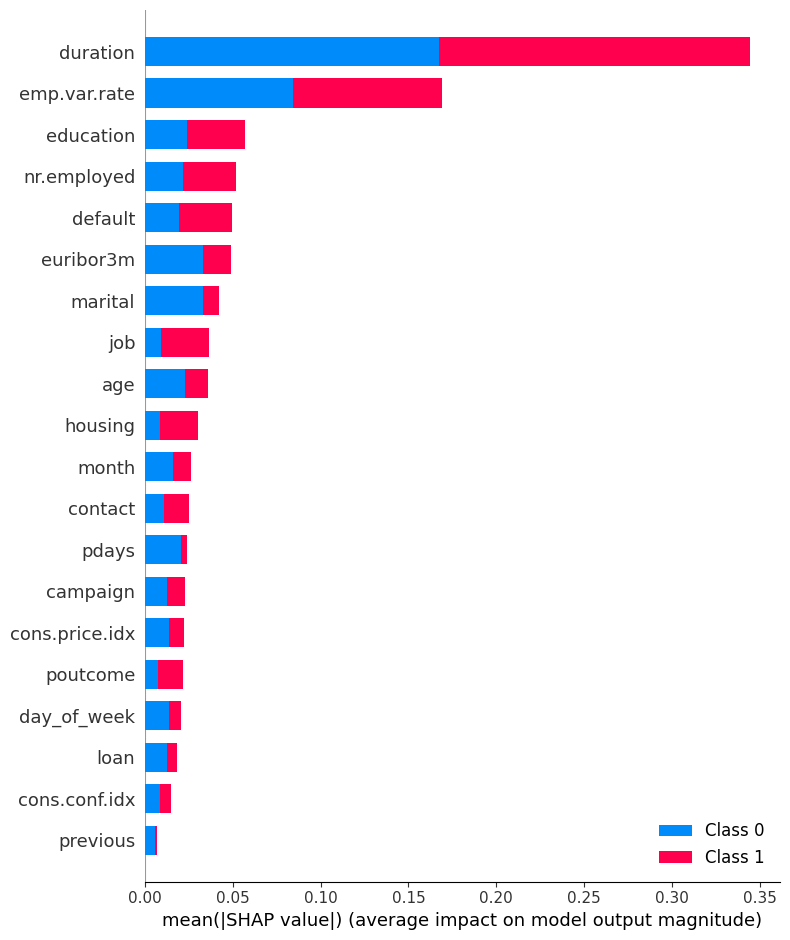

In [ ]:
print('Machine Learning Model Explanation Interface')

# Select the number of users for SHAP global explanations
num_users = int(input('Enter the number of users for SHAP global explanations: '))

# Select the indices of the users for SHAP global explanations
user_indices = []
for i in range(num_users):
    index = int(input(f'Enter the index of user {i+1} (between 0 and {len(x_train2)-1}): '))
    user_indices.append(index)

# Select the model
selected_model = input('Select Model (MLP/RF/SVM): ')

# Get the selected model
if selected_model == 'MLP':
    model2 = mlp_model2
elif selected_model == 'Random Forest':
    model2 = rf_model2
else:
    model2 = svm_model2

# Select the data instances based on the user-provided indices
selected_data = x_train2.iloc[user_indices]

explainer = shap.KernelExplainer(model2.predict_proba, selected_data)

# Compute SHAP values for global explanation for class 0
shap_values_global_class0 = explainer.shap_values(selected_data, nsamples=num_users)

# Calculate the mean absolute SHAP values across all instances for class 0
mean_shap_values_class0 = np.abs(shap_values_global_class0).mean(axis=0)

# Compute SHAP values for global explanation for class 1
shap_values_global_class1 = explainer.shap_values(selected_data, nsamples=num_users, output_inds=1)

# Calculate the mean absolute SHAP values across all instances for class 1
mean_shap_values_class1 = np.abs(shap_values_global_class1).mean(axis=0)

# Plot the global feature importance for both classes using a bar chart
shap.summary_plot([mean_shap_values_class0, mean_shap_values_class1],
                  selected_data,
                  feature_names=x_test2.columns,
                  class_names=['Class 0', 'Class 1'],
                  plot_type="bar")